<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [296]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# setting the dataframe to show all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

<a name="Data"></a>
## 2. Loading Data

In [297]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [298]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [299]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [300]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

In [301]:
train.describe()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
mean,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000
max,1795.316255,4.677280e+06,51.000000,25.246148,1064.819285,831.503948,98097.784300,4.812144e+06,1118.878021,3183.701036,475.031124,2.955622,98031.408630,46.784800,1.000000


In [302]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [303]:
train.corr()['Label'].sort_values(ascending=False)

Label                       1.000000
I/O Data Operations         0.099165
Received Bytes (HTTP)       0.052535
Network packets received    0.045522
Network packets sent        0.041176
Pages Read/sec              0.020558
Bytes Sent/sent             0.009655
Disc Writing/sec           -0.002698
Pages Input/sec            -0.024041
Time on processor          -0.029156
 I/O Data Bytes            -0.050343
Disk Reading/sec           -0.053590
Page Errors/sec            -0.117415
Confirmed byte radius      -0.174451
Number of subprocesses     -0.185420
Name: Label, dtype: float64

In [304]:
train.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius', 'Label'],
      dtype='object')

In [305]:
# FEATURE ENGINEERING TO ADD MORE FEATURES

In [306]:
train["Disk Utilization Ratio"] = train["Disk Reading/sec"]/train["Disc Writing/sec"]
train["Disk Throughput"] = train["Disk Reading/sec"] + train["Disc Writing/sec"]
train["Disk I/O Latency"] = train["Disk Reading/sec"].mean()/train["Disk Reading/sec"]
train["Disk Queue Length"] = train["Disk Reading/sec"]/train["Disk Reading/sec"].mean()

# train["Page Fault Rate"] = train["Pages Input/sec"]/train["Pages Read/sec"]
train["Page Throughput"] = train["Pages Input/sec"] + train["Pages Read/sec"]
train["Page Read Latency"] = train["Pages Read/sec"].mean()/train["Pages Read/sec"]
train["Page Input Latency"] = train["Pages Input/sec"].mean()/train["Pages Input/sec"]
train["Page Error Rate"] = train["Page Errors/sec"]/(train["Pages Read/sec"] + train["Pages Input/sec"])
train["Page Input Operations"] = train["Pages Input/sec"]/train["Pages Input/sec"].mean()

train["Total Bytes Transferred"] = train["Bytes Sent/sent"] + train["Received Bytes (HTTP)"]
train["Sent/Received Bytes Ratio"] = train["Bytes Sent/sent"] / train["Received Bytes (HTTP)"]

train["Total Packets Transferred"] = train["Network packets sent"] + train["Network packets received"]
train["Sent/Received Packets Ratio"] = train["Network packets sent"] / train["Network packets received"]


In [307]:
test["Disk Utilization Ratio"] = test["Disk Reading/sec"]/test["Disc Writing/sec"]
test["Disk Throughput"] = test["Disk Reading/sec"] + test["Disc Writing/sec"]
test["Disk I/O Latency"] = test["Disk Reading/sec"].mean()/test["Disk Reading/sec"]
test["Disk Queue Length"] = test["Disk Reading/sec"]/test["Disk Reading/sec"].mean()

# train["Page Fault Rate"] = train["Pages Input/sec"]/train["Pages Read/sec"]
test["Page Throughput"] = test["Pages Input/sec"] + test["Pages Read/sec"]
test["Page Read Latency"] = test["Pages Read/sec"].mean()/test["Pages Read/sec"]
test["Page Input Latency"] = test["Pages Input/sec"].mean()/test["Pages Input/sec"]
test["Page Error Rate"] = test["Page Errors/sec"]/(test["Pages Read/sec"] + test["Pages Input/sec"])
test["Page Input Operations"] = test["Pages Input/sec"]/test["Pages Input/sec"].mean()

test["Total Bytes Transferred"] = test["Bytes Sent/sent"] + test["Received Bytes (HTTP)"]
test["Sent/Received Bytes Ratio"] = test["Bytes Sent/sent"] / test["Received Bytes (HTTP)"]

test["Total Packets Transferred"] = test["Network packets sent"] + test["Network packets received"]
test["Sent/Received Packets Ratio"] = test["Network packets sent"] / test["Network packets received"]

In [308]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           8908 non-null   object 
 1   I/O Data Operations          8908 non-null   float64
 2    I/O Data Bytes              8908 non-null   float64
 3   Number of subprocesses       8908 non-null   float64
 4   Time on processor            8908 non-null   float64
 5   Disk Reading/sec             8908 non-null   float64
 6   Disc Writing/sec             8908 non-null   float64
 7   Bytes Sent/sent              8908 non-null   float64
 8   Received Bytes (HTTP)        8908 non-null   float64
 9   Network packets sent         8908 non-null   float64
 10  Network packets received     8908 non-null   float64
 11  Pages Read/sec               8908 non-null   float64
 12  Pages Input/sec              8908 non-null   float64
 13  Page Errors/sec   

In [309]:
train.corr()['Label'].sort_values(ascending=False)

Label                          1.000000
Page Input Latency             0.768242
Disk I/O Latency               0.227652
Page Read Latency              0.184357
I/O Data Operations            0.099165
Page Error Rate                0.074062
Sent/Received Packets Ratio    0.069640
Received Bytes (HTTP)          0.052535
Total Bytes Transferred        0.051862
Network packets received       0.045522
Total Packets Transferred      0.045486
Network packets sent           0.041176
Pages Read/sec                 0.020558
Page Throughput                0.020397
Bytes Sent/sent                0.009655
Disc Writing/sec              -0.002698
Sent/Received Bytes Ratio     -0.022552
Pages Input/sec               -0.024041
Page Input Operations         -0.024041
Time on processor             -0.029156
Disk Throughput               -0.032383
 I/O Data Bytes               -0.050343
Disk Reading/sec              -0.053590
Disk Queue Length             -0.053590
Disk Utilization Ratio        -0.087068


In [310]:
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Disk Utilization Ratio,Disk Throughput,Disk I/O Latency,Disk Queue Length,Page Throughput,Page Read Latency,Page Input Latency,Page Error Rate,Page Input Operations,Total Bytes Transferred,Sent/Received Bytes Ratio,Total Packets Transferred,Sent/Received Packets Ratio
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686,inf,3.999064,1.324422,0.755046,0.311038,3.226345,inf,2335.142857,0.0,1072.904374,0.455104,3.754677,0.965116
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399,inf,3.665467,1.444959,0.692061,0.044430,22.586522,inf,8676.000006,0.0,104.965646,1.552674,1.310682,1.269231
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141,3.888889,0.977704,6.810233,0.146838,0.000000,inf,inf,inf,0.0,22.687175,1.001961,0.311088,1.333333
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252,inf,1.789015,2.960538,0.337776,0.000000,inf,inf,inf,0.0,57.727242,3.298311,0.428356,2.400000
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570,inf,1.710369,3.096670,0.322928,0.000000,inf,inf,inf,0.0,145.670125,1.533024,1.665944,1.142857


In [311]:
# //////IMBALANCED TARGET VARIABLE DISTRIBUTION MUST BE DEALT WITH

In [312]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [313]:
for column in train.columns:
    if train[column].dtype == 'float64':
        # fill all the null numerical values with the mean for that column
        train[column] = train[column].fillna(np.mean(train[column]))

In [314]:
for column in test.columns:
    if test[column].dtype == 'float64':
        # fill all the null numerical values with the mean for that column
        test[column] = test[column].fillna(np.mean(test[column]))

In [315]:
#scale numerical features for logistic model
features = train.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler/MinMaxScaler
scaler = StandardScaler()
scaler = RobustScaler()
# scaler = MinMaxScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [316]:
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label,Disk Utilization Ratio,Disk Throughput,Disk I/O Latency,Disk Queue Length,Page Throughput,Page Read Latency,Page Input Latency,Page Error Rate,Page Input Operations,Total Bytes Transferred,Sent/Received Bytes Ratio,Total Packets Transferred,Sent/Received Packets Ratio
0,ID_4W8AP96UO6,3.117323,-0.029542,0.0,0.869267,0.874518,954.629975,-0.047333,-0.047000,-0.077651,-0.082655,276.782340,0.0,0.316988,-0.237224,1,-66.525602,4.864784,-0.366345,0.874518,276.778711,-1.664298,0.0,-4.570770,0.0,-0.053091,0.228006,-0.081485,0.363636
1,ID_UD3TM0ZYND,0.076749,0.006529,0.0,0.230734,0.724642,0.000000,-0.237261,-0.111515,-0.249956,-0.138833,0.249956,0.0,0.404135,0.281782,0,0.000000,0.695361,-0.346449,0.724642,0.249951,0.333597,0.0,1.352980,0.0,-0.135418,0.034810,-0.187821,-0.292208
2,ID_XAG1HC0HWM,-0.349522,-0.124635,0.0,-0.076956,-0.026191,0.000000,-0.296756,-0.142637,-0.461551,-0.348458,0.249998,0.0,-0.358668,-0.066721,0,0.000000,-0.029483,0.042853,-0.026191,0.249993,0.333427,0.0,-2.823962,0.0,-0.168055,0.222186,-0.392950,0.233766
3,ID_CEXD05IR09,0.596852,3.169162,1.0,1.083450,2.803547,240.977480,2.852490,12.898654,2.251739,3.716481,63.014418,0.0,11.275256,0.992490,0,-63.832597,3.718270,-0.452867,2.803547,63.013590,-1.652092,0.0,-4.063308,0.0,8.709512,-0.923748,2.967260,-1.314145
4,ID_X6E97FT8IF,-0.198414,-0.099478,-1.0,0.076956,-0.069756,0.000000,-0.273255,-0.141921,-0.480743,-0.364551,-0.250008,0.0,-0.131291,0.512512,1,0.000000,-0.071539,0.132795,-0.069756,-0.250006,0.000000,0.0,0.000000,0.0,-0.162428,0.647349,-0.410008,0.298701


In [327]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.2,
                                                    random_state=SEED)

In [328]:
from catboost import CatBoostClassifier
for max_depth in [3, 5, 8, 10, 14, 18]:
    ml = CatBoostClassifier()
    # Again, you van use a better method to evaluate the model here...
    ml.fit(X_train, y_train)

Learning rate set to 0.023829
0:	learn: 0.6607083	total: 7.96ms	remaining: 7.96s
1:	learn: 0.6359257	total: 14.8ms	remaining: 7.36s
2:	learn: 0.6096547	total: 21ms	remaining: 7s
3:	learn: 0.5842187	total: 27.2ms	remaining: 6.78s
4:	learn: 0.5593277	total: 33.3ms	remaining: 6.62s
5:	learn: 0.5376143	total: 40.1ms	remaining: 6.65s
6:	learn: 0.5206762	total: 47.4ms	remaining: 6.72s
7:	learn: 0.5029511	total: 55ms	remaining: 6.82s
8:	learn: 0.4872129	total: 64.6ms	remaining: 7.11s
9:	learn: 0.4750711	total: 75.3ms	remaining: 7.45s
10:	learn: 0.4622202	total: 84.6ms	remaining: 7.61s
11:	learn: 0.4503894	total: 94.8ms	remaining: 7.81s
12:	learn: 0.4395382	total: 103ms	remaining: 7.8s
13:	learn: 0.4297257	total: 112ms	remaining: 7.86s
14:	learn: 0.4189084	total: 119ms	remaining: 7.81s
15:	learn: 0.4120666	total: 127ms	remaining: 7.84s
16:	learn: 0.4048334	total: 135ms	remaining: 7.78s
17:	learn: 0.3967891	total: 143ms	remaining: 7.8s
18:	learn: 0.3877561	total: 151ms	remaining: 7.79s
19:	lear

175:	learn: 0.1578140	total: 1.02s	remaining: 4.76s
176:	learn: 0.1575746	total: 1.02s	remaining: 4.77s
177:	learn: 0.1572749	total: 1.03s	remaining: 4.77s
178:	learn: 0.1568976	total: 1.04s	remaining: 4.78s
179:	learn: 0.1563935	total: 1.05s	remaining: 4.77s
180:	learn: 0.1557211	total: 1.05s	remaining: 4.77s
181:	learn: 0.1553972	total: 1.06s	remaining: 4.78s
182:	learn: 0.1548815	total: 1.07s	remaining: 4.78s
183:	learn: 0.1542737	total: 1.08s	remaining: 4.78s
184:	learn: 0.1536094	total: 1.08s	remaining: 4.78s
185:	learn: 0.1533045	total: 1.09s	remaining: 4.78s
186:	learn: 0.1527872	total: 1.1s	remaining: 4.78s
187:	learn: 0.1525195	total: 1.1s	remaining: 4.77s
188:	learn: 0.1520923	total: 1.11s	remaining: 4.77s
189:	learn: 0.1516593	total: 1.12s	remaining: 4.76s
190:	learn: 0.1514283	total: 1.12s	remaining: 4.76s
191:	learn: 0.1511838	total: 1.13s	remaining: 4.75s
192:	learn: 0.1508598	total: 1.14s	remaining: 4.75s
193:	learn: 0.1505540	total: 1.14s	remaining: 4.75s
194:	learn: 0.

353:	learn: 0.1085252	total: 2.04s	remaining: 3.72s
354:	learn: 0.1083188	total: 2.04s	remaining: 3.71s
355:	learn: 0.1082302	total: 2.05s	remaining: 3.7s
356:	learn: 0.1081155	total: 2.05s	remaining: 3.7s
357:	learn: 0.1079044	total: 2.06s	remaining: 3.69s
358:	learn: 0.1075780	total: 2.06s	remaining: 3.69s
359:	learn: 0.1074388	total: 2.07s	remaining: 3.68s
360:	learn: 0.1071427	total: 2.07s	remaining: 3.67s
361:	learn: 0.1069245	total: 2.08s	remaining: 3.66s
362:	learn: 0.1067788	total: 2.08s	remaining: 3.66s
363:	learn: 0.1065093	total: 2.09s	remaining: 3.65s
364:	learn: 0.1063358	total: 2.1s	remaining: 3.64s
365:	learn: 0.1060112	total: 2.1s	remaining: 3.64s
366:	learn: 0.1058132	total: 2.1s	remaining: 3.63s
367:	learn: 0.1056259	total: 2.11s	remaining: 3.62s
368:	learn: 0.1054482	total: 2.12s	remaining: 3.62s
369:	learn: 0.1050991	total: 2.12s	remaining: 3.61s
370:	learn: 0.1050124	total: 2.13s	remaining: 3.6s
371:	learn: 0.1048202	total: 2.13s	remaining: 3.6s
372:	learn: 0.10474

512:	learn: 0.0802238	total: 2.88s	remaining: 2.74s
513:	learn: 0.0800112	total: 2.89s	remaining: 2.73s
514:	learn: 0.0798133	total: 2.9s	remaining: 2.73s
515:	learn: 0.0796333	total: 2.9s	remaining: 2.72s
516:	learn: 0.0795205	total: 2.91s	remaining: 2.72s
517:	learn: 0.0794523	total: 2.92s	remaining: 2.71s
518:	learn: 0.0792959	total: 2.92s	remaining: 2.71s
519:	learn: 0.0790968	total: 2.93s	remaining: 2.7s
520:	learn: 0.0789299	total: 2.94s	remaining: 2.7s
521:	learn: 0.0787977	total: 2.94s	remaining: 2.69s
522:	learn: 0.0785927	total: 2.95s	remaining: 2.69s
523:	learn: 0.0784339	total: 2.95s	remaining: 2.68s
524:	learn: 0.0783189	total: 2.96s	remaining: 2.68s
525:	learn: 0.0781529	total: 2.96s	remaining: 2.67s
526:	learn: 0.0779325	total: 2.97s	remaining: 2.67s
527:	learn: 0.0778305	total: 2.98s	remaining: 2.66s
528:	learn: 0.0775578	total: 2.98s	remaining: 2.66s
529:	learn: 0.0774423	total: 2.99s	remaining: 2.65s
530:	learn: 0.0773597	total: 2.99s	remaining: 2.65s
531:	learn: 0.07

703:	learn: 0.0586792	total: 3.93s	remaining: 1.65s
704:	learn: 0.0585657	total: 3.94s	remaining: 1.65s
705:	learn: 0.0584170	total: 3.94s	remaining: 1.64s
706:	learn: 0.0583141	total: 3.95s	remaining: 1.64s
707:	learn: 0.0582232	total: 3.96s	remaining: 1.63s
708:	learn: 0.0581503	total: 3.96s	remaining: 1.63s
709:	learn: 0.0580468	total: 3.97s	remaining: 1.62s
710:	learn: 0.0579257	total: 3.97s	remaining: 1.61s
711:	learn: 0.0578072	total: 3.98s	remaining: 1.61s
712:	learn: 0.0577007	total: 3.98s	remaining: 1.6s
713:	learn: 0.0576399	total: 3.99s	remaining: 1.6s
714:	learn: 0.0575124	total: 3.99s	remaining: 1.59s
715:	learn: 0.0574108	total: 4s	remaining: 1.58s
716:	learn: 0.0573518	total: 4s	remaining: 1.58s
717:	learn: 0.0573118	total: 4.01s	remaining: 1.57s
718:	learn: 0.0571309	total: 4.01s	remaining: 1.57s
719:	learn: 0.0570188	total: 4.02s	remaining: 1.56s
720:	learn: 0.0569984	total: 4.02s	remaining: 1.56s
721:	learn: 0.0569647	total: 4.03s	remaining: 1.55s
722:	learn: 0.056880

886:	learn: 0.0455734	total: 4.96s	remaining: 631ms
887:	learn: 0.0455300	total: 4.96s	remaining: 626ms
888:	learn: 0.0454551	total: 4.97s	remaining: 621ms
889:	learn: 0.0453436	total: 4.98s	remaining: 615ms
890:	learn: 0.0453058	total: 4.98s	remaining: 610ms
891:	learn: 0.0452260	total: 4.99s	remaining: 604ms
892:	learn: 0.0451476	total: 4.99s	remaining: 598ms
893:	learn: 0.0451019	total: 5s	remaining: 593ms
894:	learn: 0.0450749	total: 5s	remaining: 587ms
895:	learn: 0.0450278	total: 5.01s	remaining: 582ms
896:	learn: 0.0450046	total: 5.02s	remaining: 576ms
897:	learn: 0.0449934	total: 5.02s	remaining: 570ms
898:	learn: 0.0449712	total: 5.03s	remaining: 565ms
899:	learn: 0.0449046	total: 5.03s	remaining: 559ms
900:	learn: 0.0448576	total: 5.04s	remaining: 554ms
901:	learn: 0.0447954	total: 5.04s	remaining: 548ms
902:	learn: 0.0447475	total: 5.05s	remaining: 543ms
903:	learn: 0.0447233	total: 5.06s	remaining: 537ms
904:	learn: 0.0446216	total: 5.06s	remaining: 532ms
905:	learn: 0.0445

56:	learn: 0.2533719	total: 349ms	remaining: 5.78s
57:	learn: 0.2523333	total: 354ms	remaining: 5.76s
58:	learn: 0.2502987	total: 359ms	remaining: 5.73s
59:	learn: 0.2482105	total: 365ms	remaining: 5.71s
60:	learn: 0.2471665	total: 370ms	remaining: 5.7s
61:	learn: 0.2444875	total: 376ms	remaining: 5.69s
62:	learn: 0.2421353	total: 382ms	remaining: 5.68s
63:	learn: 0.2405939	total: 387ms	remaining: 5.66s
64:	learn: 0.2395883	total: 392ms	remaining: 5.64s
65:	learn: 0.2371043	total: 398ms	remaining: 5.63s
66:	learn: 0.2361157	total: 403ms	remaining: 5.61s
67:	learn: 0.2349879	total: 408ms	remaining: 5.59s
68:	learn: 0.2337204	total: 413ms	remaining: 5.58s
69:	learn: 0.2327678	total: 418ms	remaining: 5.56s
70:	learn: 0.2315037	total: 423ms	remaining: 5.54s
71:	learn: 0.2303637	total: 429ms	remaining: 5.53s
72:	learn: 0.2294959	total: 434ms	remaining: 5.51s
73:	learn: 0.2286182	total: 439ms	remaining: 5.49s
74:	learn: 0.2278726	total: 444ms	remaining: 5.48s
75:	learn: 0.2267522	total: 450m

231:	learn: 0.1392073	total: 1.39s	remaining: 4.6s
232:	learn: 0.1388910	total: 1.4s	remaining: 4.59s
233:	learn: 0.1384239	total: 1.4s	remaining: 4.59s
234:	learn: 0.1379073	total: 1.41s	remaining: 4.59s
235:	learn: 0.1376993	total: 1.42s	remaining: 4.59s
236:	learn: 0.1375233	total: 1.42s	remaining: 4.58s
237:	learn: 0.1373820	total: 1.43s	remaining: 4.58s
238:	learn: 0.1369348	total: 1.44s	remaining: 4.58s
239:	learn: 0.1367630	total: 1.44s	remaining: 4.57s
240:	learn: 0.1364691	total: 1.45s	remaining: 4.57s
241:	learn: 0.1363078	total: 1.46s	remaining: 4.56s
242:	learn: 0.1360296	total: 1.46s	remaining: 4.55s
243:	learn: 0.1356982	total: 1.47s	remaining: 4.54s
244:	learn: 0.1354121	total: 1.47s	remaining: 4.53s
245:	learn: 0.1352241	total: 1.48s	remaining: 4.53s
246:	learn: 0.1349718	total: 1.48s	remaining: 4.53s
247:	learn: 0.1345083	total: 1.49s	remaining: 4.52s
248:	learn: 0.1342163	total: 1.5s	remaining: 4.51s
249:	learn: 0.1338098	total: 1.5s	remaining: 4.51s
250:	learn: 0.133

411:	learn: 0.0969473	total: 2.44s	remaining: 3.48s
412:	learn: 0.0967616	total: 2.44s	remaining: 3.47s
413:	learn: 0.0963079	total: 2.45s	remaining: 3.46s
414:	learn: 0.0960540	total: 2.45s	remaining: 3.46s
415:	learn: 0.0958402	total: 2.46s	remaining: 3.45s
416:	learn: 0.0957193	total: 2.47s	remaining: 3.45s
417:	learn: 0.0953915	total: 2.47s	remaining: 3.44s
418:	learn: 0.0952479	total: 2.48s	remaining: 3.44s
419:	learn: 0.0950946	total: 2.48s	remaining: 3.43s
420:	learn: 0.0949638	total: 2.49s	remaining: 3.42s
421:	learn: 0.0948410	total: 2.49s	remaining: 3.42s
422:	learn: 0.0946004	total: 2.5s	remaining: 3.41s
423:	learn: 0.0944953	total: 2.5s	remaining: 3.4s
424:	learn: 0.0942900	total: 2.51s	remaining: 3.4s
425:	learn: 0.0941769	total: 2.52s	remaining: 3.39s
426:	learn: 0.0940314	total: 2.52s	remaining: 3.38s
427:	learn: 0.0938719	total: 2.53s	remaining: 3.38s
428:	learn: 0.0936588	total: 2.53s	remaining: 3.37s
429:	learn: 0.0933798	total: 2.54s	remaining: 3.36s
430:	learn: 0.09

593:	learn: 0.0693054	total: 3.49s	remaining: 2.39s
594:	learn: 0.0692701	total: 3.5s	remaining: 2.38s
595:	learn: 0.0691785	total: 3.51s	remaining: 2.38s
596:	learn: 0.0690887	total: 3.52s	remaining: 2.37s
597:	learn: 0.0690473	total: 3.52s	remaining: 2.37s
598:	learn: 0.0689168	total: 3.53s	remaining: 2.36s
599:	learn: 0.0686921	total: 3.54s	remaining: 2.36s
600:	learn: 0.0686397	total: 3.54s	remaining: 2.35s
601:	learn: 0.0684839	total: 3.55s	remaining: 2.34s
602:	learn: 0.0683246	total: 3.55s	remaining: 2.34s
603:	learn: 0.0682869	total: 3.56s	remaining: 2.33s
604:	learn: 0.0681315	total: 3.56s	remaining: 2.33s
605:	learn: 0.0679337	total: 3.57s	remaining: 2.32s
606:	learn: 0.0678229	total: 3.57s	remaining: 2.31s
607:	learn: 0.0677939	total: 3.58s	remaining: 2.31s
608:	learn: 0.0676961	total: 3.59s	remaining: 2.3s
609:	learn: 0.0676727	total: 3.59s	remaining: 2.3s
610:	learn: 0.0676086	total: 3.6s	remaining: 2.29s
611:	learn: 0.0674783	total: 3.6s	remaining: 2.29s
612:	learn: 0.067

779:	learn: 0.0525264	total: 4.55s	remaining: 1.28s
780:	learn: 0.0524245	total: 4.55s	remaining: 1.28s
781:	learn: 0.0523937	total: 4.56s	remaining: 1.27s
782:	learn: 0.0523319	total: 4.56s	remaining: 1.26s
783:	learn: 0.0522368	total: 4.57s	remaining: 1.26s
784:	learn: 0.0521991	total: 4.58s	remaining: 1.25s
785:	learn: 0.0521145	total: 4.58s	remaining: 1.25s
786:	learn: 0.0520230	total: 4.59s	remaining: 1.24s
787:	learn: 0.0519305	total: 4.59s	remaining: 1.24s
788:	learn: 0.0518981	total: 4.6s	remaining: 1.23s
789:	learn: 0.0518392	total: 4.61s	remaining: 1.22s
790:	learn: 0.0518242	total: 4.61s	remaining: 1.22s
791:	learn: 0.0517743	total: 4.62s	remaining: 1.21s
792:	learn: 0.0516885	total: 4.62s	remaining: 1.21s
793:	learn: 0.0516088	total: 4.63s	remaining: 1.2s
794:	learn: 0.0514911	total: 4.63s	remaining: 1.19s
795:	learn: 0.0513823	total: 4.64s	remaining: 1.19s
796:	learn: 0.0513206	total: 4.64s	remaining: 1.18s
797:	learn: 0.0512727	total: 4.65s	remaining: 1.18s
798:	learn: 0.

954:	learn: 0.0424526	total: 5.58s	remaining: 263ms
955:	learn: 0.0423443	total: 5.59s	remaining: 257ms
956:	learn: 0.0423350	total: 5.59s	remaining: 251ms
957:	learn: 0.0423164	total: 5.6s	remaining: 246ms
958:	learn: 0.0423086	total: 5.61s	remaining: 240ms
959:	learn: 0.0422963	total: 5.62s	remaining: 234ms
960:	learn: 0.0422237	total: 5.62s	remaining: 228ms
961:	learn: 0.0421618	total: 5.63s	remaining: 222ms
962:	learn: 0.0421397	total: 5.63s	remaining: 217ms
963:	learn: 0.0420697	total: 5.64s	remaining: 211ms
964:	learn: 0.0419615	total: 5.65s	remaining: 205ms
965:	learn: 0.0418696	total: 5.66s	remaining: 199ms
966:	learn: 0.0418597	total: 5.67s	remaining: 193ms
967:	learn: 0.0418160	total: 5.67s	remaining: 188ms
968:	learn: 0.0417976	total: 5.68s	remaining: 182ms
969:	learn: 0.0417560	total: 5.69s	remaining: 176ms
970:	learn: 0.0416905	total: 5.7s	remaining: 170ms
971:	learn: 0.0416808	total: 5.71s	remaining: 164ms
972:	learn: 0.0416256	total: 5.71s	remaining: 159ms
973:	learn: 0.

125:	learn: 0.1834797	total: 1.09s	remaining: 7.54s
126:	learn: 0.1824328	total: 1.09s	remaining: 7.52s
127:	learn: 0.1815942	total: 1.1s	remaining: 7.52s
128:	learn: 0.1808644	total: 1.11s	remaining: 7.52s
129:	learn: 0.1803907	total: 1.12s	remaining: 7.5s
130:	learn: 0.1796700	total: 1.13s	remaining: 7.48s
131:	learn: 0.1793183	total: 1.13s	remaining: 7.46s
132:	learn: 0.1785404	total: 1.14s	remaining: 7.44s
133:	learn: 0.1780935	total: 1.15s	remaining: 7.43s
134:	learn: 0.1777178	total: 1.16s	remaining: 7.42s
135:	learn: 0.1771693	total: 1.17s	remaining: 7.4s
136:	learn: 0.1762855	total: 1.17s	remaining: 7.4s
137:	learn: 0.1758273	total: 1.18s	remaining: 7.38s
138:	learn: 0.1755146	total: 1.19s	remaining: 7.39s
139:	learn: 0.1751548	total: 1.2s	remaining: 7.38s
140:	learn: 0.1745591	total: 1.21s	remaining: 7.36s
141:	learn: 0.1740738	total: 1.22s	remaining: 7.34s
142:	learn: 0.1735502	total: 1.22s	remaining: 7.33s
143:	learn: 0.1731600	total: 1.23s	remaining: 7.3s
144:	learn: 0.1727

306:	learn: 0.1190216	total: 2.53s	remaining: 5.72s
307:	learn: 0.1187731	total: 2.54s	remaining: 5.71s
308:	learn: 0.1185180	total: 2.55s	remaining: 5.71s
309:	learn: 0.1181730	total: 2.57s	remaining: 5.71s
310:	learn: 0.1180509	total: 2.57s	remaining: 5.7s
311:	learn: 0.1179712	total: 2.58s	remaining: 5.7s
312:	learn: 0.1177594	total: 2.59s	remaining: 5.69s
313:	learn: 0.1173947	total: 2.6s	remaining: 5.69s
314:	learn: 0.1171657	total: 2.62s	remaining: 5.69s
315:	learn: 0.1170113	total: 2.63s	remaining: 5.68s
316:	learn: 0.1166346	total: 2.63s	remaining: 5.68s
317:	learn: 0.1163589	total: 2.64s	remaining: 5.67s
318:	learn: 0.1161532	total: 2.65s	remaining: 5.66s
319:	learn: 0.1158931	total: 2.66s	remaining: 5.66s
320:	learn: 0.1158021	total: 2.67s	remaining: 5.65s
321:	learn: 0.1156038	total: 2.68s	remaining: 5.65s
322:	learn: 0.1152625	total: 2.69s	remaining: 5.64s
323:	learn: 0.1150815	total: 2.7s	remaining: 5.63s
324:	learn: 0.1149646	total: 2.71s	remaining: 5.62s
325:	learn: 0.11

491:	learn: 0.0832473	total: 4.22s	remaining: 4.36s
492:	learn: 0.0830487	total: 4.23s	remaining: 4.35s
493:	learn: 0.0828969	total: 4.24s	remaining: 4.34s
494:	learn: 0.0827883	total: 4.25s	remaining: 4.33s
495:	learn: 0.0826742	total: 4.25s	remaining: 4.32s
496:	learn: 0.0825449	total: 4.26s	remaining: 4.31s
497:	learn: 0.0824336	total: 4.27s	remaining: 4.3s
498:	learn: 0.0821785	total: 4.28s	remaining: 4.3s
499:	learn: 0.0820314	total: 4.29s	remaining: 4.29s
500:	learn: 0.0819147	total: 4.29s	remaining: 4.28s
501:	learn: 0.0817916	total: 4.3s	remaining: 4.27s
502:	learn: 0.0816467	total: 4.31s	remaining: 4.26s
503:	learn: 0.0815556	total: 4.32s	remaining: 4.25s
504:	learn: 0.0814637	total: 4.33s	remaining: 4.24s
505:	learn: 0.0813914	total: 4.34s	remaining: 4.23s
506:	learn: 0.0812942	total: 4.34s	remaining: 4.22s
507:	learn: 0.0811564	total: 4.35s	remaining: 4.21s
508:	learn: 0.0809289	total: 4.36s	remaining: 4.21s
509:	learn: 0.0806899	total: 4.37s	remaining: 4.2s
510:	learn: 0.08

657:	learn: 0.0625300	total: 5.68s	remaining: 2.95s
658:	learn: 0.0624124	total: 5.69s	remaining: 2.94s
659:	learn: 0.0623040	total: 5.7s	remaining: 2.94s
660:	learn: 0.0622238	total: 5.71s	remaining: 2.93s
661:	learn: 0.0621530	total: 5.71s	remaining: 2.92s
662:	learn: 0.0620702	total: 5.72s	remaining: 2.91s
663:	learn: 0.0620133	total: 5.73s	remaining: 2.9s
664:	learn: 0.0618940	total: 5.74s	remaining: 2.89s
665:	learn: 0.0618179	total: 5.74s	remaining: 2.88s
666:	learn: 0.0617704	total: 5.75s	remaining: 2.87s
667:	learn: 0.0616357	total: 5.76s	remaining: 2.86s
668:	learn: 0.0614686	total: 5.77s	remaining: 2.85s
669:	learn: 0.0614311	total: 5.78s	remaining: 2.85s
670:	learn: 0.0612823	total: 5.79s	remaining: 2.84s
671:	learn: 0.0611279	total: 5.79s	remaining: 2.83s
672:	learn: 0.0610912	total: 5.8s	remaining: 2.82s
673:	learn: 0.0610230	total: 5.81s	remaining: 2.81s
674:	learn: 0.0609118	total: 5.82s	remaining: 2.8s
675:	learn: 0.0608622	total: 5.82s	remaining: 2.79s
676:	learn: 0.06

831:	learn: 0.0488848	total: 7.12s	remaining: 1.44s
832:	learn: 0.0487860	total: 7.13s	remaining: 1.43s
833:	learn: 0.0487202	total: 7.14s	remaining: 1.42s
834:	learn: 0.0486383	total: 7.15s	remaining: 1.41s
835:	learn: 0.0485901	total: 7.16s	remaining: 1.41s
836:	learn: 0.0484835	total: 7.17s	remaining: 1.4s
837:	learn: 0.0484518	total: 7.18s	remaining: 1.39s
838:	learn: 0.0484008	total: 7.19s	remaining: 1.38s
839:	learn: 0.0483559	total: 7.2s	remaining: 1.37s
840:	learn: 0.0482812	total: 7.21s	remaining: 1.36s
841:	learn: 0.0482701	total: 7.22s	remaining: 1.35s
842:	learn: 0.0482357	total: 7.23s	remaining: 1.35s
843:	learn: 0.0481786	total: 7.24s	remaining: 1.34s
844:	learn: 0.0481168	total: 7.25s	remaining: 1.33s
845:	learn: 0.0480348	total: 7.26s	remaining: 1.32s
846:	learn: 0.0479338	total: 7.27s	remaining: 1.31s
847:	learn: 0.0478798	total: 7.28s	remaining: 1.3s
848:	learn: 0.0478338	total: 7.29s	remaining: 1.29s
849:	learn: 0.0478182	total: 7.3s	remaining: 1.29s
850:	learn: 0.04

996:	learn: 0.0405094	total: 8.59s	remaining: 25.8ms
997:	learn: 0.0404844	total: 8.6s	remaining: 17.2ms
998:	learn: 0.0404471	total: 8.61s	remaining: 8.62ms
999:	learn: 0.0404231	total: 8.62s	remaining: 0us
Learning rate set to 0.023829
0:	learn: 0.6607083	total: 11.2ms	remaining: 11.2s
1:	learn: 0.6359257	total: 22.7ms	remaining: 11.3s
2:	learn: 0.6096547	total: 34.7ms	remaining: 11.5s
3:	learn: 0.5842187	total: 44.2ms	remaining: 11s
4:	learn: 0.5593277	total: 54ms	remaining: 10.7s
5:	learn: 0.5376143	total: 62.8ms	remaining: 10.4s
6:	learn: 0.5206762	total: 72ms	remaining: 10.2s
7:	learn: 0.5029511	total: 80.5ms	remaining: 9.98s
8:	learn: 0.4872129	total: 88.1ms	remaining: 9.7s
9:	learn: 0.4750711	total: 95.8ms	remaining: 9.48s
10:	learn: 0.4622202	total: 104ms	remaining: 9.31s
11:	learn: 0.4503894	total: 112ms	remaining: 9.19s
12:	learn: 0.4395382	total: 121ms	remaining: 9.21s
13:	learn: 0.4297257	total: 131ms	remaining: 9.22s
14:	learn: 0.4189084	total: 142ms	remaining: 9.35s
15:	

175:	learn: 0.1578140	total: 1.55s	remaining: 7.25s
176:	learn: 0.1575746	total: 1.56s	remaining: 7.25s
177:	learn: 0.1572749	total: 1.57s	remaining: 7.24s
178:	learn: 0.1568976	total: 1.58s	remaining: 7.24s
179:	learn: 0.1563935	total: 1.59s	remaining: 7.23s
180:	learn: 0.1557211	total: 1.59s	remaining: 7.21s
181:	learn: 0.1553972	total: 1.6s	remaining: 7.21s
182:	learn: 0.1548815	total: 1.61s	remaining: 7.2s
183:	learn: 0.1542737	total: 1.62s	remaining: 7.19s
184:	learn: 0.1536094	total: 1.63s	remaining: 7.18s
185:	learn: 0.1533045	total: 1.64s	remaining: 7.18s
186:	learn: 0.1527872	total: 1.65s	remaining: 7.17s
187:	learn: 0.1525195	total: 1.66s	remaining: 7.16s
188:	learn: 0.1520923	total: 1.67s	remaining: 7.15s
189:	learn: 0.1516593	total: 1.67s	remaining: 7.14s
190:	learn: 0.1514283	total: 1.68s	remaining: 7.13s
191:	learn: 0.1511838	total: 1.69s	remaining: 7.11s
192:	learn: 0.1508598	total: 1.7s	remaining: 7.1s
193:	learn: 0.1505540	total: 1.71s	remaining: 7.09s
194:	learn: 0.15

339:	learn: 0.1115789	total: 3.02s	remaining: 5.85s
340:	learn: 0.1112825	total: 3.02s	remaining: 5.84s
341:	learn: 0.1111136	total: 3.04s	remaining: 5.84s
342:	learn: 0.1108247	total: 3.04s	remaining: 5.83s
343:	learn: 0.1104870	total: 3.05s	remaining: 5.82s
344:	learn: 0.1103792	total: 3.06s	remaining: 5.81s
345:	learn: 0.1100606	total: 3.07s	remaining: 5.8s
346:	learn: 0.1098879	total: 3.08s	remaining: 5.79s
347:	learn: 0.1096015	total: 3.08s	remaining: 5.78s
348:	learn: 0.1094045	total: 3.09s	remaining: 5.77s
349:	learn: 0.1092763	total: 3.1s	remaining: 5.76s
350:	learn: 0.1089978	total: 3.11s	remaining: 5.75s
351:	learn: 0.1089015	total: 3.12s	remaining: 5.74s
352:	learn: 0.1086844	total: 3.13s	remaining: 5.73s
353:	learn: 0.1085252	total: 3.13s	remaining: 5.72s
354:	learn: 0.1083188	total: 3.14s	remaining: 5.7s
355:	learn: 0.1082302	total: 3.15s	remaining: 5.69s
356:	learn: 0.1081155	total: 3.15s	remaining: 5.68s
357:	learn: 0.1079044	total: 3.16s	remaining: 5.67s
358:	learn: 0.1

505:	learn: 0.0813914	total: 4.48s	remaining: 4.38s
506:	learn: 0.0812942	total: 4.49s	remaining: 4.37s
507:	learn: 0.0811564	total: 4.51s	remaining: 4.37s
508:	learn: 0.0809289	total: 4.52s	remaining: 4.36s
509:	learn: 0.0806899	total: 4.53s	remaining: 4.35s
510:	learn: 0.0805352	total: 4.53s	remaining: 4.34s
511:	learn: 0.0803954	total: 4.54s	remaining: 4.33s
512:	learn: 0.0802238	total: 4.55s	remaining: 4.32s
513:	learn: 0.0800112	total: 4.56s	remaining: 4.32s
514:	learn: 0.0798133	total: 4.57s	remaining: 4.31s
515:	learn: 0.0796333	total: 4.58s	remaining: 4.3s
516:	learn: 0.0795205	total: 4.59s	remaining: 4.29s
517:	learn: 0.0794523	total: 4.6s	remaining: 4.28s
518:	learn: 0.0792959	total: 4.61s	remaining: 4.27s
519:	learn: 0.0790968	total: 4.62s	remaining: 4.26s
520:	learn: 0.0789299	total: 4.63s	remaining: 4.25s
521:	learn: 0.0787977	total: 4.64s	remaining: 4.25s
522:	learn: 0.0785927	total: 4.64s	remaining: 4.24s
523:	learn: 0.0784339	total: 4.66s	remaining: 4.23s
524:	learn: 0.

672:	learn: 0.0610912	total: 5.89s	remaining: 2.86s
673:	learn: 0.0610230	total: 5.9s	remaining: 2.86s
674:	learn: 0.0609118	total: 5.92s	remaining: 2.85s
675:	learn: 0.0608622	total: 5.92s	remaining: 2.84s
676:	learn: 0.0607784	total: 5.93s	remaining: 2.83s
677:	learn: 0.0607060	total: 5.94s	remaining: 2.82s
678:	learn: 0.0606623	total: 5.95s	remaining: 2.81s
679:	learn: 0.0606358	total: 5.96s	remaining: 2.8s
680:	learn: 0.0604980	total: 5.96s	remaining: 2.79s
681:	learn: 0.0603155	total: 5.97s	remaining: 2.79s
682:	learn: 0.0601621	total: 5.98s	remaining: 2.78s
683:	learn: 0.0601366	total: 5.99s	remaining: 2.77s
684:	learn: 0.0600605	total: 6s	remaining: 2.76s
685:	learn: 0.0599691	total: 6.01s	remaining: 2.75s
686:	learn: 0.0598707	total: 6.02s	remaining: 2.74s
687:	learn: 0.0598033	total: 6.02s	remaining: 2.73s
688:	learn: 0.0597313	total: 6.04s	remaining: 2.72s
689:	learn: 0.0597067	total: 6.04s	remaining: 2.71s
690:	learn: 0.0596095	total: 6.05s	remaining: 2.71s
691:	learn: 0.059

841:	learn: 0.0482701	total: 7.35s	remaining: 1.38s
842:	learn: 0.0482357	total: 7.36s	remaining: 1.37s
843:	learn: 0.0481786	total: 7.37s	remaining: 1.36s
844:	learn: 0.0481168	total: 7.38s	remaining: 1.35s
845:	learn: 0.0480348	total: 7.39s	remaining: 1.34s
846:	learn: 0.0479338	total: 7.4s	remaining: 1.34s
847:	learn: 0.0478798	total: 7.41s	remaining: 1.33s
848:	learn: 0.0478338	total: 7.42s	remaining: 1.32s
849:	learn: 0.0478182	total: 7.42s	remaining: 1.31s
850:	learn: 0.0477887	total: 7.43s	remaining: 1.3s
851:	learn: 0.0476895	total: 7.44s	remaining: 1.29s
852:	learn: 0.0476216	total: 7.45s	remaining: 1.28s
853:	learn: 0.0475520	total: 7.46s	remaining: 1.27s
854:	learn: 0.0474753	total: 7.46s	remaining: 1.26s
855:	learn: 0.0474451	total: 7.47s	remaining: 1.26s
856:	learn: 0.0473699	total: 7.48s	remaining: 1.25s
857:	learn: 0.0473431	total: 7.49s	remaining: 1.24s
858:	learn: 0.0472184	total: 7.5s	remaining: 1.23s
859:	learn: 0.0471887	total: 7.5s	remaining: 1.22s
860:	learn: 0.04

4:	learn: 0.5593277	total: 55ms	remaining: 11s
5:	learn: 0.5376143	total: 65.5ms	remaining: 10.9s
6:	learn: 0.5206762	total: 74.8ms	remaining: 10.6s
7:	learn: 0.5029511	total: 84.2ms	remaining: 10.4s
8:	learn: 0.4872129	total: 92.7ms	remaining: 10.2s
9:	learn: 0.4750711	total: 101ms	remaining: 10s
10:	learn: 0.4622202	total: 111ms	remaining: 9.99s
11:	learn: 0.4503894	total: 121ms	remaining: 9.96s
12:	learn: 0.4395382	total: 130ms	remaining: 9.9s
13:	learn: 0.4297257	total: 141ms	remaining: 9.94s
14:	learn: 0.4189084	total: 151ms	remaining: 9.89s
15:	learn: 0.4120666	total: 160ms	remaining: 9.85s
16:	learn: 0.4048334	total: 168ms	remaining: 9.74s
17:	learn: 0.3967891	total: 177ms	remaining: 9.63s
18:	learn: 0.3877561	total: 185ms	remaining: 9.54s
19:	learn: 0.3802355	total: 193ms	remaining: 9.45s
20:	learn: 0.3732596	total: 201ms	remaining: 9.39s
21:	learn: 0.3647662	total: 210ms	remaining: 9.33s
22:	learn: 0.3585539	total: 219ms	remaining: 9.28s
23:	learn: 0.3532853	total: 227ms	remai

166:	learn: 0.1606992	total: 1.53s	remaining: 7.65s
167:	learn: 0.1603615	total: 1.55s	remaining: 7.66s
168:	learn: 0.1601938	total: 1.55s	remaining: 7.64s
169:	learn: 0.1598182	total: 1.56s	remaining: 7.63s
170:	learn: 0.1594735	total: 1.57s	remaining: 7.61s
171:	learn: 0.1591604	total: 1.58s	remaining: 7.6s
172:	learn: 0.1588712	total: 1.58s	remaining: 7.58s
173:	learn: 0.1586349	total: 1.59s	remaining: 7.57s
174:	learn: 0.1582931	total: 1.6s	remaining: 7.55s
175:	learn: 0.1578140	total: 1.61s	remaining: 7.54s
176:	learn: 0.1575746	total: 1.62s	remaining: 7.52s
177:	learn: 0.1572749	total: 1.63s	remaining: 7.51s
178:	learn: 0.1568976	total: 1.63s	remaining: 7.49s
179:	learn: 0.1563935	total: 1.64s	remaining: 7.48s
180:	learn: 0.1557211	total: 1.65s	remaining: 7.46s
181:	learn: 0.1553972	total: 1.66s	remaining: 7.45s
182:	learn: 0.1548815	total: 1.67s	remaining: 7.44s
183:	learn: 0.1542737	total: 1.67s	remaining: 7.42s
184:	learn: 0.1536094	total: 1.68s	remaining: 7.41s
185:	learn: 0.

340:	learn: 0.1112825	total: 3s	remaining: 5.79s
341:	learn: 0.1111136	total: 3.01s	remaining: 5.79s
342:	learn: 0.1108247	total: 3.02s	remaining: 5.79s
343:	learn: 0.1104870	total: 3.03s	remaining: 5.78s
344:	learn: 0.1103792	total: 3.04s	remaining: 5.77s
345:	learn: 0.1100606	total: 3.05s	remaining: 5.77s
346:	learn: 0.1098879	total: 3.06s	remaining: 5.76s
347:	learn: 0.1096015	total: 3.07s	remaining: 5.76s
348:	learn: 0.1094045	total: 3.08s	remaining: 5.75s
349:	learn: 0.1092763	total: 3.09s	remaining: 5.74s
350:	learn: 0.1089978	total: 3.1s	remaining: 5.73s
351:	learn: 0.1089015	total: 3.11s	remaining: 5.72s
352:	learn: 0.1086844	total: 3.12s	remaining: 5.71s
353:	learn: 0.1085252	total: 3.13s	remaining: 5.71s
354:	learn: 0.1083188	total: 3.14s	remaining: 5.7s
355:	learn: 0.1082302	total: 3.15s	remaining: 5.69s
356:	learn: 0.1081155	total: 3.15s	remaining: 5.68s
357:	learn: 0.1079044	total: 3.16s	remaining: 5.67s
358:	learn: 0.1075780	total: 3.17s	remaining: 5.66s
359:	learn: 0.107

515:	learn: 0.0796333	total: 4.47s	remaining: 4.2s
516:	learn: 0.0795205	total: 4.49s	remaining: 4.19s
517:	learn: 0.0794523	total: 4.5s	remaining: 4.18s
518:	learn: 0.0792959	total: 4.51s	remaining: 4.18s
519:	learn: 0.0790968	total: 4.51s	remaining: 4.17s
520:	learn: 0.0789299	total: 4.52s	remaining: 4.16s
521:	learn: 0.0787977	total: 4.53s	remaining: 4.15s
522:	learn: 0.0785927	total: 4.54s	remaining: 4.14s
523:	learn: 0.0784339	total: 4.55s	remaining: 4.13s
524:	learn: 0.0783189	total: 4.55s	remaining: 4.12s
525:	learn: 0.0781529	total: 4.56s	remaining: 4.11s
526:	learn: 0.0779325	total: 4.57s	remaining: 4.1s
527:	learn: 0.0778305	total: 4.58s	remaining: 4.09s
528:	learn: 0.0775578	total: 4.59s	remaining: 4.09s
529:	learn: 0.0774423	total: 4.6s	remaining: 4.08s
530:	learn: 0.0773597	total: 4.6s	remaining: 4.07s
531:	learn: 0.0772428	total: 4.61s	remaining: 4.06s
532:	learn: 0.0770641	total: 4.62s	remaining: 4.05s
533:	learn: 0.0769404	total: 4.63s	remaining: 4.04s
534:	learn: 0.076

686:	learn: 0.0598707	total: 5.96s	remaining: 2.71s
687:	learn: 0.0598033	total: 5.96s	remaining: 2.71s
688:	learn: 0.0597313	total: 5.97s	remaining: 2.7s
689:	learn: 0.0597067	total: 5.99s	remaining: 2.69s
690:	learn: 0.0596095	total: 6s	remaining: 2.68s
691:	learn: 0.0594661	total: 6s	remaining: 2.67s
692:	learn: 0.0594354	total: 6.01s	remaining: 2.66s
693:	learn: 0.0593971	total: 6.02s	remaining: 2.65s
694:	learn: 0.0593016	total: 6.02s	remaining: 2.64s
695:	learn: 0.0591790	total: 6.03s	remaining: 2.63s
696:	learn: 0.0591266	total: 6.04s	remaining: 2.63s
697:	learn: 0.0591065	total: 6.05s	remaining: 2.62s
698:	learn: 0.0590708	total: 6.05s	remaining: 2.61s
699:	learn: 0.0590288	total: 6.06s	remaining: 2.6s
700:	learn: 0.0589395	total: 6.07s	remaining: 2.59s
701:	learn: 0.0588192	total: 6.08s	remaining: 2.58s
702:	learn: 0.0587862	total: 6.08s	remaining: 2.57s
703:	learn: 0.0586792	total: 6.09s	remaining: 2.56s
704:	learn: 0.0585657	total: 6.1s	remaining: 2.55s
705:	learn: 0.0584170

858:	learn: 0.0472184	total: 7.42s	remaining: 1.22s
859:	learn: 0.0471887	total: 7.42s	remaining: 1.21s
860:	learn: 0.0471531	total: 7.43s	remaining: 1.2s
861:	learn: 0.0470995	total: 7.45s	remaining: 1.19s
862:	learn: 0.0470539	total: 7.46s	remaining: 1.18s
863:	learn: 0.0470191	total: 7.47s	remaining: 1.18s
864:	learn: 0.0469760	total: 7.47s	remaining: 1.17s
865:	learn: 0.0468438	total: 7.48s	remaining: 1.16s
866:	learn: 0.0467721	total: 7.49s	remaining: 1.15s
867:	learn: 0.0466649	total: 7.5s	remaining: 1.14s
868:	learn: 0.0466384	total: 7.51s	remaining: 1.13s
869:	learn: 0.0466124	total: 7.52s	remaining: 1.12s
870:	learn: 0.0465485	total: 7.53s	remaining: 1.11s
871:	learn: 0.0465210	total: 7.54s	remaining: 1.11s
872:	learn: 0.0464382	total: 7.54s	remaining: 1.1s
873:	learn: 0.0464015	total: 7.55s	remaining: 1.09s
874:	learn: 0.0463815	total: 7.56s	remaining: 1.08s
875:	learn: 0.0463537	total: 7.57s	remaining: 1.07s
876:	learn: 0.0462823	total: 7.58s	remaining: 1.06s
877:	learn: 0.0

25:	learn: 0.3456688	total: 242ms	remaining: 9.08s
26:	learn: 0.3386608	total: 251ms	remaining: 9.06s
27:	learn: 0.3332226	total: 264ms	remaining: 9.15s
28:	learn: 0.3298001	total: 275ms	remaining: 9.2s
29:	learn: 0.3255043	total: 283ms	remaining: 9.15s
30:	learn: 0.3221650	total: 292ms	remaining: 9.11s
31:	learn: 0.3180764	total: 299ms	remaining: 9.03s
32:	learn: 0.3150237	total: 308ms	remaining: 9.02s
33:	learn: 0.3110082	total: 316ms	remaining: 8.98s
34:	learn: 0.3065502	total: 325ms	remaining: 8.96s
35:	learn: 0.3027312	total: 335ms	remaining: 8.96s
36:	learn: 0.2996384	total: 343ms	remaining: 8.92s
37:	learn: 0.2955945	total: 351ms	remaining: 8.89s
38:	learn: 0.2935730	total: 359ms	remaining: 8.85s
39:	learn: 0.2902459	total: 367ms	remaining: 8.81s
40:	learn: 0.2880998	total: 375ms	remaining: 8.77s
41:	learn: 0.2845491	total: 384ms	remaining: 8.77s
42:	learn: 0.2817138	total: 391ms	remaining: 8.71s
43:	learn: 0.2799014	total: 399ms	remaining: 8.67s
44:	learn: 0.2776531	total: 406m

193:	learn: 0.1505540	total: 1.7s	remaining: 7.07s
194:	learn: 0.1503364	total: 1.71s	remaining: 7.05s
195:	learn: 0.1501516	total: 1.72s	remaining: 7.05s
196:	learn: 0.1497533	total: 1.73s	remaining: 7.04s
197:	learn: 0.1494898	total: 1.74s	remaining: 7.04s
198:	learn: 0.1491728	total: 1.74s	remaining: 7.02s
199:	learn: 0.1487528	total: 1.75s	remaining: 7.01s
200:	learn: 0.1483190	total: 1.76s	remaining: 7s
201:	learn: 0.1480452	total: 1.77s	remaining: 7s
202:	learn: 0.1477110	total: 1.78s	remaining: 6.99s
203:	learn: 0.1474348	total: 1.79s	remaining: 6.97s
204:	learn: 0.1470432	total: 1.79s	remaining: 6.96s
205:	learn: 0.1467997	total: 1.8s	remaining: 6.95s
206:	learn: 0.1464940	total: 1.81s	remaining: 6.94s
207:	learn: 0.1461899	total: 1.82s	remaining: 6.92s
208:	learn: 0.1456456	total: 1.83s	remaining: 6.91s
209:	learn: 0.1453937	total: 1.83s	remaining: 6.9s
210:	learn: 0.1451718	total: 1.84s	remaining: 6.89s
211:	learn: 0.1449362	total: 1.85s	remaining: 6.88s
212:	learn: 0.1445794

362:	learn: 0.1067788	total: 3.16s	remaining: 5.54s
363:	learn: 0.1065093	total: 3.17s	remaining: 5.53s
364:	learn: 0.1063358	total: 3.18s	remaining: 5.53s
365:	learn: 0.1060112	total: 3.19s	remaining: 5.52s
366:	learn: 0.1058132	total: 3.19s	remaining: 5.51s
367:	learn: 0.1056259	total: 3.2s	remaining: 5.5s
368:	learn: 0.1054482	total: 3.21s	remaining: 5.49s
369:	learn: 0.1050991	total: 3.22s	remaining: 5.48s
370:	learn: 0.1050124	total: 3.22s	remaining: 5.46s
371:	learn: 0.1048202	total: 3.23s	remaining: 5.45s
372:	learn: 0.1047431	total: 3.24s	remaining: 5.44s
373:	learn: 0.1045846	total: 3.25s	remaining: 5.43s
374:	learn: 0.1043867	total: 3.25s	remaining: 5.42s
375:	learn: 0.1042016	total: 3.26s	remaining: 5.41s
376:	learn: 0.1039660	total: 3.27s	remaining: 5.4s
377:	learn: 0.1037195	total: 3.27s	remaining: 5.39s
378:	learn: 0.1034958	total: 3.28s	remaining: 5.38s
379:	learn: 0.1033904	total: 3.29s	remaining: 5.37s
380:	learn: 0.1032329	total: 3.3s	remaining: 5.36s
381:	learn: 0.10

535:	learn: 0.0766850	total: 4.61s	remaining: 3.99s
536:	learn: 0.0765259	total: 4.62s	remaining: 3.99s
537:	learn: 0.0763324	total: 4.63s	remaining: 3.98s
538:	learn: 0.0761664	total: 4.64s	remaining: 3.97s
539:	learn: 0.0760781	total: 4.66s	remaining: 3.96s
540:	learn: 0.0759808	total: 4.66s	remaining: 3.96s
541:	learn: 0.0759033	total: 4.67s	remaining: 3.95s
542:	learn: 0.0758485	total: 4.68s	remaining: 3.94s
543:	learn: 0.0756587	total: 4.69s	remaining: 3.93s
544:	learn: 0.0754950	total: 4.7s	remaining: 3.92s
545:	learn: 0.0754217	total: 4.7s	remaining: 3.91s
546:	learn: 0.0752843	total: 4.71s	remaining: 3.9s
547:	learn: 0.0751398	total: 4.72s	remaining: 3.9s
548:	learn: 0.0749923	total: 4.73s	remaining: 3.89s
549:	learn: 0.0748929	total: 4.74s	remaining: 3.88s
550:	learn: 0.0748151	total: 4.75s	remaining: 3.87s
551:	learn: 0.0747173	total: 4.76s	remaining: 3.86s
552:	learn: 0.0746708	total: 4.76s	remaining: 3.85s
553:	learn: 0.0745712	total: 4.77s	remaining: 3.84s
554:	learn: 0.07

712:	learn: 0.0577007	total: 6.07s	remaining: 2.44s
713:	learn: 0.0576399	total: 6.08s	remaining: 2.43s
714:	learn: 0.0575124	total: 6.09s	remaining: 2.43s
715:	learn: 0.0574108	total: 6.1s	remaining: 2.42s
716:	learn: 0.0573518	total: 6.11s	remaining: 2.41s
717:	learn: 0.0573118	total: 6.12s	remaining: 2.4s
718:	learn: 0.0571309	total: 6.12s	remaining: 2.39s
719:	learn: 0.0570188	total: 6.13s	remaining: 2.38s
720:	learn: 0.0569984	total: 6.14s	remaining: 2.38s
721:	learn: 0.0569647	total: 6.15s	remaining: 2.37s
722:	learn: 0.0568805	total: 6.16s	remaining: 2.36s
723:	learn: 0.0568213	total: 6.17s	remaining: 2.35s
724:	learn: 0.0567106	total: 6.17s	remaining: 2.34s
725:	learn: 0.0566467	total: 6.18s	remaining: 2.33s
726:	learn: 0.0565624	total: 6.19s	remaining: 2.32s
727:	learn: 0.0564900	total: 6.2s	remaining: 2.32s
728:	learn: 0.0563923	total: 6.21s	remaining: 2.31s
729:	learn: 0.0563741	total: 6.21s	remaining: 2.3s
730:	learn: 0.0563522	total: 6.22s	remaining: 2.29s
731:	learn: 0.05

882:	learn: 0.0458707	total: 7.49s	remaining: 992ms
883:	learn: 0.0458203	total: 7.5s	remaining: 984ms
884:	learn: 0.0457017	total: 7.5s	remaining: 975ms
885:	learn: 0.0456188	total: 7.52s	remaining: 967ms
886:	learn: 0.0455734	total: 7.53s	remaining: 959ms
887:	learn: 0.0455300	total: 7.53s	remaining: 950ms
888:	learn: 0.0454551	total: 7.54s	remaining: 942ms
889:	learn: 0.0453436	total: 7.55s	remaining: 933ms
890:	learn: 0.0453058	total: 7.56s	remaining: 925ms
891:	learn: 0.0452260	total: 7.57s	remaining: 916ms
892:	learn: 0.0451476	total: 7.58s	remaining: 908ms
893:	learn: 0.0451019	total: 7.58s	remaining: 899ms
894:	learn: 0.0450749	total: 7.59s	remaining: 891ms
895:	learn: 0.0450278	total: 7.6s	remaining: 882ms
896:	learn: 0.0450046	total: 7.61s	remaining: 874ms
897:	learn: 0.0449934	total: 7.62s	remaining: 865ms
898:	learn: 0.0449712	total: 7.62s	remaining: 857ms
899:	learn: 0.0449046	total: 7.63s	remaining: 848ms
900:	learn: 0.0448576	total: 7.64s	remaining: 839ms
901:	learn: 0.0

In [329]:
ml.score(X_test, y_test) # Show a score

0.9736251402918069

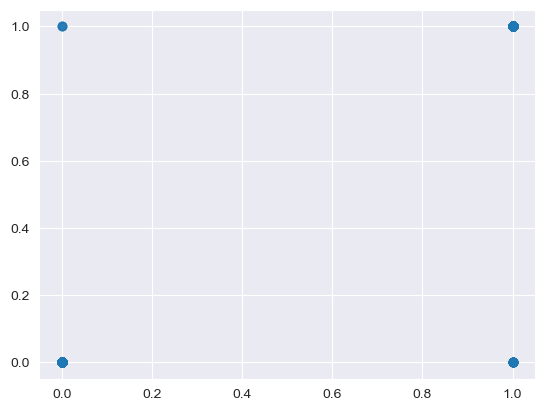

In [330]:
from matplotlib import pyplot as plt
plt.scatter(y_test, ml.predict(X_test), alpha=0.3)

In [331]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = ml.predict(X_test)
# The `squared=False` bit tells this function to return the ROOT mean squared error
mse = mean_squared_error(y_test, ml.predict(X_test))
mae = mean_absolute_error(y_test, ml.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))
print("Mean Absolute Error:", mae)
print(f'CatBoost MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

Root Mean Square Error: 0.16240338576579322
Mean Absolute Error: 0.026374859708193043
CatBoost MAE score on the X_test is: 0.026374859708193043


In [332]:
#check performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1301
           1       0.98      0.92      0.95       481

    accuracy                           0.97      1782
   macro avg       0.98      0.96      0.97      1782
weighted avg       0.97      0.97      0.97      1782



In [333]:
#make predictions on test set
test['Target'] = ml.predict(test[features])

In [334]:
sub = test[['ID', 'Target']]

In [335]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [336]:
sub.to_csv('Submissions/Feature_Engineered_CatBoost23nd.csv', index=False)

In [343]:
X_train.shape

(7126, 27)

In [338]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [344]:
model = Sequential()
model.add(Dense(128, input_dim=27, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) 

In [345]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [346]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
713/713 [==============================] - 4s 3ms/step - loss: 1.1734 - accuracy: 0.7186
Epoch 2/100
713/713 [==============================] - 2s 3ms/step - loss: 0.8369 - accuracy: 0.7540
Epoch 3/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5880 - accuracy: 0.7779
Epoch 4/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5237 - accuracy: 0.7988
Epoch 5/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5187 - accuracy: 0.8164
Epoch 6/100
713/713 [==============================] - 2s 3ms/step - loss: 0.4766 - accuracy: 0.8266
Epoch 7/100
713/713 [==============================] - 2s 3ms/step - loss: 0.4453 - accuracy: 0.8341
Epoch 8/100
713/713 [==============================] - 2s 3ms/step - loss: 0.3928 - accuracy: 0.8430
Epoch 9/100
713/713 [==============================] - 2s 3ms/step - loss: 0.3788 - accuracy: 0.8490
Epoch 10/100
713/713 [==============================] - 2s 3ms/step - loss: 0.3594 - accura

713/713 [==============================] - 2s 3ms/step - loss: 0.1890 - accuracy: 0.9338
Epoch 82/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1981 - accuracy: 0.9303
Epoch 83/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1629 - accuracy: 0.9367
Epoch 84/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1723 - accuracy: 0.9377
Epoch 85/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1809 - accuracy: 0.9345
Epoch 86/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1829 - accuracy: 0.9317
Epoch 87/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1684 - accuracy: 0.9388
Epoch 88/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1804 - accuracy: 0.9360
Epoch 89/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1754 - accuracy: 0.9340
Epoch 90/100
713/713 [==============================] - 2s 3ms/step - loss: 0.1620 - accuracy: 

In [348]:
# ////T
loss, accuracy = model.evaluate(X_train, y_train)

223/223 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9540


In [349]:
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

Accuracy: 95.40
Loss: 12.56


In [350]:
# y_pred = model.predict(Xtest)
y_pred = (model.predict(X_test) > 0.5).astype(int)

56/56 [==============================] - 0s 1ms/step


In [351]:
from sklearn.metrics import accuracy_score

In [352]:
# Calculate the accuracy score
accuracy = accuracy_score(test[features], y_pred)
print(f'Accuracy: {accuracy}')

ValueError: Found input variables with inconsistent numbers of samples: [3818, 1782]